In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('MSFT.csv', header=0, usecols=['Date','Close'],parse_dates=True,index_col='Date')
print(data)

                 Close
Date                  
2019-05-28  126.160004
2019-05-29  124.940002
2019-05-30  125.730003
2019-05-31  123.680000
2019-06-03  119.839996
...                ...
2020-05-18  184.910004
2020-05-19  183.630005
2020-05-20  185.660004
2020-05-21  183.429993
2020-05-22  183.509995

[251 rows x 1 columns]


In [3]:
import matplotlib.pyplot as plt

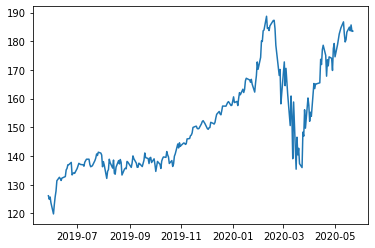

In [4]:
plt.plot(data['Close'])
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.09178054]
 [0.0740634 ]
 [0.08553597]
 [0.05576538]
 [0.        ]
 [0.04821388]
 [0.08698818]
 [0.11588736]
 [0.16787682]
 [0.18530366]
 [0.17804255]
 [0.16918398]
 [0.18123745]
 [0.18312519]
 [0.18893421]
 [0.22248051]
 [0.23017725]
 [0.24847518]
 [0.24876568]
 [0.26052865]
 [0.19735691]
 [0.20461802]
 [0.20781292]
 [0.20505389]
 [0.2300319 ]
 [0.24310203]
 [0.25588165]
 [0.25007264]
 [0.24862055]
 [0.24135944]
 [0.26154531]
 [0.26953235]
 [0.27679346]
 [0.27679346]
 [0.25036314]
 [0.23860017]
 [0.24077842]
 [0.24368282]
 [0.269968  ]
 [0.28245711]
 [0.303224  ]
 [0.29552724]
 [0.3122277 ]
 [0.30772586]
 [0.29785085]
 [0.23860017]
 [0.26459486]
 [0.24774902]
 [0.17964001]
 [0.21565504]
 [0.2242231 ]
 [0.27664831]
 [0.25951221]
 [0.23162935]
 [0.27243697]
 [0.20534417]
 [0.20098746]
 [0.23656707]
 [0.26967772]
 [0.25297704]
 [0.275196  ]
 [0.26052865]
 [0.19677611]
 [0.22669185]
 [0.23090341]
 [0.22828931]
 [0.26546614]
 [0.26169046]
 [0.2352599 ]
 [0.2583504 ]
 [0.29349414]
 [0.27

In [6]:
train_length = int(len(scaled_data)*0.7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

In [7]:
import numpy as np

In [22]:
def create_dataset(dataset,timestep):
    data_x,data_y = [],[]
    for i in range(len(dataset)-timestep-1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
    return np.array(data_x), np.array(data_y)

In [23]:
timestep = 1
train_x,train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)
print(train_x)

[[0.09178054]
 [0.0740634 ]
 [0.08553597]
 [0.05576538]
 [0.        ]
 [0.04821388]
 [0.08698818]
 [0.11588736]
 [0.16787682]
 [0.18530366]
 [0.17804255]
 [0.16918398]
 [0.18123745]
 [0.18312519]
 [0.18893421]
 [0.22248051]
 [0.23017725]
 [0.24847518]
 [0.24876568]
 [0.26052865]
 [0.19735691]
 [0.20461802]
 [0.20781292]
 [0.20505389]
 [0.2300319 ]
 [0.24310203]
 [0.25588165]
 [0.25007264]
 [0.24862055]
 [0.24135944]
 [0.26154531]
 [0.26953235]
 [0.27679346]
 [0.27679346]
 [0.25036314]
 [0.23860017]
 [0.24077842]
 [0.24368282]
 [0.269968  ]
 [0.28245711]
 [0.303224  ]
 [0.29552724]
 [0.3122277 ]
 [0.30772586]
 [0.29785085]
 [0.23860017]
 [0.26459486]
 [0.24774902]
 [0.17964001]
 [0.21565504]
 [0.2242231 ]
 [0.27664831]
 [0.25951221]
 [0.23162935]
 [0.27243697]
 [0.20534417]
 [0.20098746]
 [0.23656707]
 [0.26967772]
 [0.25297704]
 [0.275196  ]
 [0.26052865]
 [0.19677611]
 [0.22669185]
 [0.23090341]
 [0.22828931]
 [0.26546614]
 [0.26169046]
 [0.2352599 ]
 [0.2583504 ]
 [0.29349414]
 [0.27

In [24]:
print(train_x.shape)

(173, 1)


In [28]:
train_x = np.reshape(train_x,(train_x.shape[0],1,train_x.shape[1]))
test_x = np.reshape(test_x,(test_x.shape[0],1,test_x.shape[1]))

print(train_x)

[[[0.09178054]]

 [[0.0740634 ]]

 [[0.08553597]]

 [[0.05576538]]

 [[0.        ]]

 [[0.04821388]]

 [[0.08698818]]

 [[0.11588736]]

 [[0.16787682]]

 [[0.18530366]]

 [[0.17804255]]

 [[0.16918398]]

 [[0.18123745]]

 [[0.18312519]]

 [[0.18893421]]

 [[0.22248051]]

 [[0.23017725]]

 [[0.24847518]]

 [[0.24876568]]

 [[0.26052865]]

 [[0.19735691]]

 [[0.20461802]]

 [[0.20781292]]

 [[0.20505389]]

 [[0.2300319 ]]

 [[0.24310203]]

 [[0.25588165]]

 [[0.25007264]]

 [[0.24862055]]

 [[0.24135944]]

 [[0.26154531]]

 [[0.26953235]]

 [[0.27679346]]

 [[0.27679346]]

 [[0.25036314]]

 [[0.23860017]]

 [[0.24077842]]

 [[0.24368282]]

 [[0.269968  ]]

 [[0.28245711]]

 [[0.303224  ]]

 [[0.29552724]]

 [[0.3122277 ]]

 [[0.30772586]]

 [[0.29785085]]

 [[0.23860017]]

 [[0.26459486]]

 [[0.24774902]]

 [[0.17964001]]

 [[0.21565504]]

 [[0.2242231 ]]

 [[0.27664831]]

 [[0.25951221]]

 [[0.23162935]]

 [[0.27243697]]

 [[0.20534417]]

 [[0.20098746]]

 [[0.23656707]]

 [[0.26967772]

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [35]:
model = Sequential()
model.add(LSTM(256,input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.fit(train_x,train_y,epochs=1,batch_size=1,verbose=1)
score = model.evaluate(train_x,train_y,verbose=0)
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

Epoch 1/1
173/173 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.0058
Keras model loss =  0.006627296081426516
Keras model accuracy =  0.005780346691608429


In [39]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)
print(train_predictions)

[[0.2508362 ]
 [0.24370903]
 [0.24830568]
 [0.23651779]
 [0.21565968]
 [0.23360029]
 [0.24889237]
 [0.26079327]
 [0.2832806 ]
 [0.29112503]
 [0.287838  ]
 [0.28386366]
 [0.28928107]
 [0.2901361 ]
 [0.29277852]
 [0.30836433]
 [0.31201792]
 [0.32081765]
 [0.32095867]
 [0.32670087]
 [0.29663953]
 [0.29999638]
 [0.30148154]
 [0.30019867]
 [0.31194866]
 [0.3182171 ]
 [0.32442465]
 [0.32159343]
 [0.32088822]
 [0.3173766 ]
 [0.32720017]
 [0.33113956]
 [0.3347463 ]
 [0.3347463 ]
 [0.32173467]
 [0.3160488 ]
 [0.3170967 ]
 [0.31849754]
 [0.33135527]
 [0.33757615]
 [0.34807497]
 [0.34416157]
 [0.35268545]
 [0.35037586]
 [0.3453403 ]
 [0.3160488 ]
 [0.32870078]
 [0.3204654 ]
 [0.28855893]
 [0.30514842]
 [0.30918902]
 [0.33467394]
 [0.3262021 ]
 [0.31271037]
 [0.33257946]
 [0.30033344]
 [0.2983147 ]
 [0.3150727 ]
 [0.3312115 ]
 [0.323007  ]
 [0.33395076]
 [0.32670087]
 [0.29637218]
 [0.31035987]
 [0.31236407]
 [0.31111905]
 [0.32913032]
 [0.32727152]
 [0.3144462 ]
 [0.32563266]
 [0.3431322 ]
 [0.33

In [40]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)

[[137.11258]
 [136.6218 ]
 [136.93832]
 [136.1266 ]
 [134.69032]
 [135.9257 ]
 [136.97873]
 [137.79822]
 [139.3467 ]
 [139.88687]
 [139.66052]
 [139.38686]
 [139.75989]
 [139.81877]
 [140.00072]
 [141.07396]
 [141.32555]
 [141.9315 ]
 [141.94121]
 [142.33662]
 [140.26659]
 [140.49774]
 [140.6    ]
 [140.51169]
 [141.32079]
 [141.75243]
 [142.17989]
 [141.98492]
 [141.93636]
 [141.69455]
 [142.371  ]
 [142.64226]
 [142.89062]
 [142.89062]
 [141.99464]
 [141.60312]
 [141.67528]
 [141.77174]
 [142.65712]
 [143.0855 ]
 [143.80843]
 [143.53896]
 [144.12592]
 [143.96687]
 [143.62012]
 [141.60312]
 [142.47433]
 [141.90724]
 [139.71016]
 [140.85251]
 [141.13075]
 [142.88564]
 [142.30228]
 [141.37323]
 [142.74141]
 [140.52097]
 [140.38196]
 [141.5359 ]
 [142.64722]
 [142.08226]
 [142.83585]
 [142.33662]
 [140.24818]
 [141.21138]
 [141.34938]
 [141.26366]
 [142.50392]
 [142.3759 ]
 [141.49277]
 [142.26305]
 [143.46808]
 [142.99043]
 [142.20921]
 [141.51193]
 [141.5311 ]
 [142.20921]
 [142.11153]

In [41]:
#aligning train_predict_plot w train_predictions to graph them easily
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1,:] = train_predictions
#first 30%

In [43]:
#aligning test_predict_plot w test_predictions to graph them easily
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2+1:len(scaled_data)-1,:] = test_predictions
#final 70%

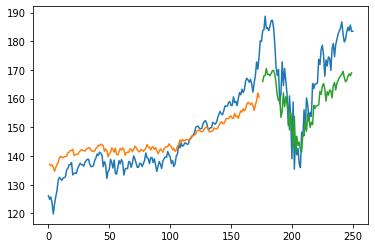

In [44]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()